In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
# 데이터 불러오고 전처리
# 오피스텔
data1 = pd.read_excel('./data/price/오피스텔_전세가격1.xlsx')
data1 = data1[['2019.01', '2019.07', '2020.01']]
data1.rename(columns={'2019.01':'2019년 01월',
                     '2019.07':'2019년 07월',
                     '2020.01':'2020년 01월'}, inplace=True)
data1 = data1.drop(0)
data1 = data1.iloc[0]

data2 = pd.read_excel('./data/price/오피스텔_전세가격2.xlsx', header=10)
data2 = data2[['2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data2 = data2.drop(0)
data2 = data2.iloc[0]

# 오피스텔 concat
data = pd.concat((data1, data2))

# 단독
data3 = pd.read_excel('./data/price/평균전세가격_단독.xlsx', header=10)
data3 = data3.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data3 = data3[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data3 = data3.iloc[0]

# 아파트
data4 = pd.read_excel('./data/price/평균전세가격_아파트.xlsx', header=10)
data4 = data4.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data4 = data4[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data4 = data4.iloc[0]

# 연립다세대
data5 = pd.read_excel('./data/price/평균전세가격_연립다세대.xlsx', header=10)
data5 = data5.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data5 = data5[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data5 = data5.iloc[0]

C:\Users\User\anaconda3\envs\pydatavenv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# 데이터 합치기
df = pd.concat([data, data3, data4, data5], axis=1)
df = df.T
df.index = ['오피스텔', '단독', '아파트', '연립다세대']
df

,2019년 01월,2019년 07월,2020년 01월,2020년 07월,2021년 01월,2021년 07월,2022년 01월
오피스텔,141630,141059,141638,163525,165916,168168,172122
단독,141970,141695,140910,141504,142145,162110,163670
아파트,228000,223366,231562,236923,253946,308699,319475
연립다세대,113378,112614,116374,116751,118205,137918,139877


Text(0, 0.5, '가격(천원)')

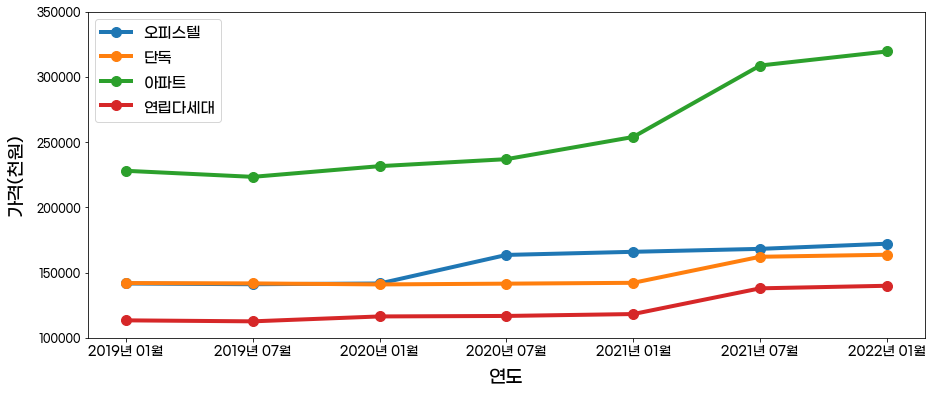

In [20]:
# plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (15, 6)

lines = df.T.plot(linewidth=4, marker='o', markersize=10)

# for x,y in enumerate(df.T['아파트']):
#     plt.text(x,y+9000,f'{round(y/100000,2)}억원',ha='center',fontsize=13)

plt.xticks(fontsize=13)
plt.yticks(np.arange(100000,400000,50000), fontsize=11)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('가격(천원)', fontsize=18, labelpad=10)